In [14]:
from cProfile import label

from customhys import benchmark_func as bf
from customhys import metaheuristic as mh


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
import pandas as pd

### Alpine 1
####  Domain Limits::  −10 ≤ xi ≤ 10
-  (Continuous, Non-Differentiable, Separable, Non-Scalable, Multimodal)
-  The global minimum is located at origin x∗ = (0, · · · , 0),
f(x∗) = 0.

### Dimensions:2

In [15]:
## Metaheuristics with Dimension 2
# Name: ackley_metaheuristic
# Code:
import sys
from pathlib import Path

fun = bf.Ackley1(2) # Changed to the Ackley function with 2 dimensions.
prob = fun.get_formatted_problem()
heur = [
    (  # Search operator 1
        'local_random_walk',
        {
            'probability': 0.7,
            'scale': 0.9,
            'distribution': 'uniform'
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.8,
            'angle': 25.0,
            'sigma': 0.2
        },
        'constriction'
    )
]


met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))



Search operators to employ:
local_random_walk(probability=0.7,scale=0.9,distribution='uniform') with greedy
spiral_dynamic(radius=0.8,angle=25.0,sigma=0.2) with constriction
--------------------------------------------------
1
pop. radius: 1.0634936283454963
x_best = [ 4.43250366 -0.59911961], f_best = 11.671196552222463
2
pop. radius: 0.7685779957529306
x_best = [-4.10348448 -1.13805486], f_best = 9.709186761162732
3
pop. radius: 0.7501016668394036
x_best = [-4.10348448 -1.13805486], f_best = 9.709186761162732
4
pop. radius: 1.0306982037429278
x_best = [-0.8607597   4.02138967], f_best = 9.276607995831942
5
pop. radius: 0.7184443845579304
x_best = [-1.46614632 -0.59750196], f_best = 6.322940064580859
6
pop. radius: 0.6237977957982701
x_best = [-1.46614632 -0.59750196], f_best = 6.322940064580859
7
pop. radius: 0.5891509651017388
x_best = [ 0.7149712  -1.27314352], f_best = 5.615804340717936
8
pop. radius: 0.4684913360785731
x_best = [0.42675402 0.65984826], f_best = 4.333313902941455

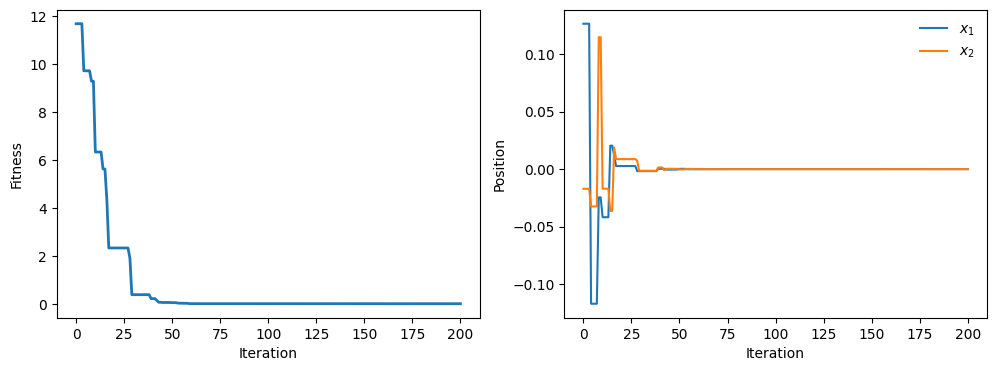

In [16]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

In [ ]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=2)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

rep = 1, x_best = [-0.25709221 -0.00569147], f_best = 15.188923356462386
rep = 2, x_best = [ 0.05661291 -0.11334404], f_best = 9.355363622759638
rep = 3, x_best = [-0.08687086 -0.05649454], f_best = 8.081999668188807
rep = 4, x_best = [ 0.08741064 -0.39779738], f_best = 17.5748777425393
rep = 5, x_best = [-0.31475646 -1.        ], f_best = 19.89573149438073
rep = 6, x_best = [0.11336966 0.02887836], f_best = 8.82202848649273


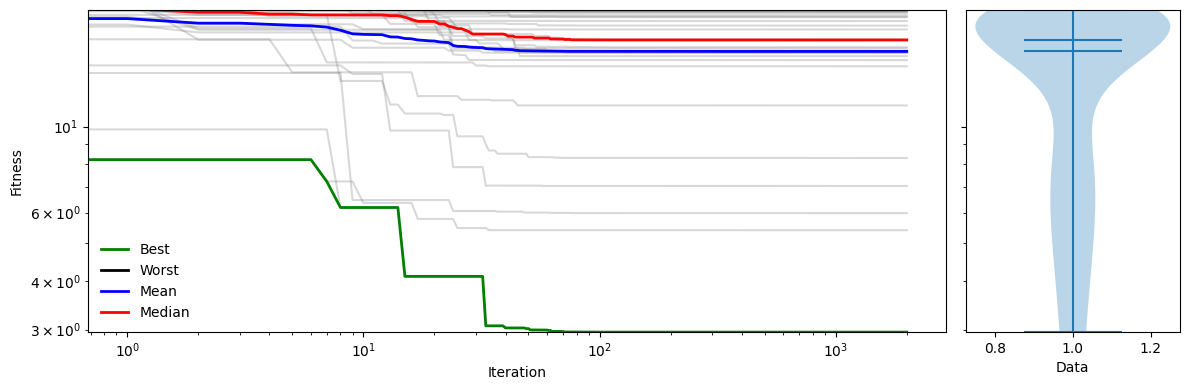

In [ ]:
fitness_array = np.array(fitness).T
final_fitness = np.array([x[-1] for x in fitness_array.T])
best_fitness = np.min(fitness_array)
initial_fitness = max([x[0] for x in fitness_array])

# Now plot the fitness values
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
axs[0].plot(fitness_array, 'grey', alpha=0.3)

axs[0].plot(np.min(fitness_array, axis=1), 'g', lw=2, label='Best')
axs[0].plot(np.max(fitness_array, axis=1), 'k', lw=2, label='Worst')
axs[0].plot(np.mean(fitness_array, axis=1), 'b', lw=2, label='Mean')
axs[0].plot(np.median(fitness_array, axis=1), 'r', lw=2, label='Median')

axs[0].set_ylabel(r'Fitness')
axs[0].set_xlabel(r'Iteration')
axs[0].set_ylim([best_fitness, initial_fitness])

# Violin plot
axs[1].violinplot(final_fitness, showmeans=True, showmedians=True)
axs[1].set_xlabel(r'Data')

axs[0].legend(frameon=False)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
plt.tight_layout()
plt.show()

In [ ]:
# 2
# Name: Alpine_Adamant
# Code:
import sys
from pathlib import Path

import benchmark_func as bf
import metaheuristic as mh

fun = bf.Alpine1(2)
prob = fun.get_formatted_problem()

heur = [
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis'
    ),
    (
        'random_flight',
        {
            'scale': 1.0,
            'distribution': 'levy',
            'beta': 1.5
        },
        'probabilistic'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

ModuleNotFoundError: No module named 'benchmark_func'

In [ ]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=2)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

In [ ]:
# 3 
# Name: AlpineMeta
# Code:
import sys
from pathlib import Path

import benchmark_func as bf
import metaheuristic as mh

fun = bf.Alpine1(2)
prob = fun.get_formatted_problem()

heur = [
    (
        'random_flight',
        {
            'scale': 0.9,
            'distribution': 'levy',
            'beta': 4.5
        },
        'greedy'
    ),
    (
        'gravitational_search',
        {
            'gravity': 1.2,
            'alpha': 0.02
        },
        'all'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.8,
            'scale': 0.7,
            'distribution': 'gaussian'
        },
        'metropolis'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

In [ ]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=2)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

In [ ]:
# 4
# Name: Alpine_Rainbow
# Code:
import sys
from pathlib import Path




fun = bf.Alpine1(2)
prob = fun.get_formatted_problem()

heur = [
    ( 
        'local_random_walk',  
        {  
            'probability': 0.8,  
            'scale': 1.0,  
            'distribution': 'gaussian'  
        },  
        'metropolis'  
    ),  

    (  
        'spiral_dynamic',  
        {  
            'radius': 0.85,  
            'angle': 22.5,  
            'sigma': 0.1  
        },  
        'probabilistic'  
    ),  

    (  
        'random_flight',  
        {  
            'scale': 1.0,  
            'distribution': 'levy',  
            'beta': 2.5  
        },  
        'greedy'  
    )  
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

In [ ]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=2)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

In [ ]:
# 4
# Name: alpine_meta
# Code:
import sys
from pathlib import Path



fun = bf.Alpine1(2)
prob = fun.get_formatted_problem()

heur = [
    (
        'random_sample',
        {
            # parameters for random_sample operator
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.95,
            'angle': 22.8,
            'sigma': 0.1
        },
        'greedy'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(met.get_solution()[0], met.get_solution()[1]))

In [ ]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=2)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

In [ ]:
# 5
# Name: Alpine_2
# Code:
import sys
from pathlib import Path


fun = bf.Alpine1(2)
prob = fun.get_formatted_problem()

heur = [
    (  
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis'
    ),
    (
        'random_flight',
        {
            'scale': 1.0,
            'distribution': 'levy',
            'beta': 1.5
        },
        'probabilistic'
    ),
    (
        'gravitational_search',
        {
            'gravity': 1.0,
            'alpha': 0.02
        },
        'metropolis'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

In [ ]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=2)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])